In [2]:
import tensorflow as tf
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [3]:
print(tf.__version__)
import sys
print(sys.version)

2.5.0-rc3
3.9.5 (v3.9.5:0a7dcbdb13, May  3 2021, 13:17:02) 
[Clang 6.0 (clang-600.0.57)]


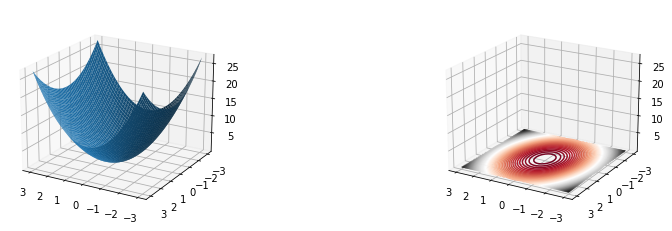

In [49]:
x = np.linspace(-3.0, 3.0, 50)
y = np.linspace(-3.0, 3.0, 50)

X, Y = np.meshgrid(x, y)
Z = 2.0 * (X ** 2) + Y ** 2

norm = mpl.colors.Normalize(-abs(Z).max(), abs(Z).max())
fig, ax = plt.subplots(1,2, figsize = (14, 4), subplot_kw = {'projection': '3d'})

ax[0].plot_surface(X, Y, Z, rstride = 1, cstride = 1, linewidth = 0, norm = norm)
ax[0].view_init(elev=20., azim=120)
ax[1].contour(X, Y, Z, 60, offset = 0, cmap='RdGy')
ax[1].view_init(elev=20., azim=120)

In [55]:
## Using high-level API Keras for optimization
## Defining a TF array variable
X = tf.Variable([1.0,1.0])

## defining the function
Z = lambda: 2.0 * X[0] ** 2 + (X[1]) ** 2
'''
def Z():
    y = 2 * (X[0] ** 2) + X[1] ** 2
    return y
'''
opt = tf.keras.optimizers.Adam(learning_rate = 0.5)


for _ in range(1000):
    opt.minimize(Z, var_list = X)

print(X.numpy())

[1.7332069e-23 1.7332476e-23]


In [8]:
## Using low-level API (Gradiant Descent)

X = tf.Variable([1.0, 1.0])

epochs = 1000
lr = 0.01
for _ in range(epochs):
    with tf.GradientTape() as t:
        Z = 2.0 * (X[0] ** 2) + X[1] ** 2
    Zp = t.gradient(Z, X)
    Zp_norm = tf.sqrt(tf.reduce_sum(tf.square(Zp)))
    X.assign_sub(lr * Zp/Zp_norm)
    
print(X.numpy())

[ 3.2476368e-03 -1.5962337e-37]
